In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('data_group6.txt')

In [4]:
data.shape

(627, 4)

No handles with labels found to put in legend.


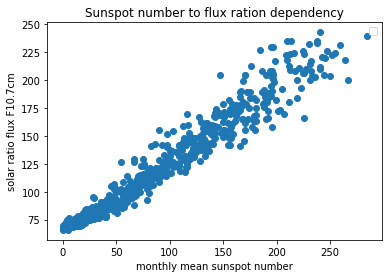

In [5]:
plt.scatter(data[:,3], data[:,2])
plt.title('Sunspot number to flux ration dependency')
plt.xlabel('monthly mean sunspot number')
plt.ylabel('solar ratio flux F10.7cm')
plt.legend()
plt.show()

In [6]:
sunspot_num_smth = np.empty(data.shape[0])
solar_flux_smth = np.empty(data.shape[0])
sunspot_num_smth[:6] = np.ones([1, 6]) * np.mean(data[:6,3])
sunspot_num_smth[-6:] = np.ones([1, 6]) * np.mean(data[-6:,3])
solar_flux_smth[:6] = np.ones([1, 6]) * np.mean(data[:6,2])
solar_flux_smth[-6:] = np.ones([1, 6]) * np.mean(data[-6:,2])
for i in range(6, data.shape[0] - 6):
    sunspot_num_smth[i] = 1/24 * (data[i-6][3] + data[i+6][3]) + 1/12 * (np.sum(data[i-5:i+6, 3]))
    solar_flux_smth[i] = 1/24 * (data[i-6][2] + data[i+6][2]) + 1/12 * (np.sum(data[i-5:i+6, 2]))

In [7]:
sunspot_num_smth

array([ 34.75      ,  34.75      ,  34.75      ,  34.75      ,
        34.75      ,  34.75      ,  22.31666667,  18.60416667,
        15.95833333,  15.0375    ,  15.175     ,  15.10416667,
        14.64166667,  14.25416667,  14.98333333,  16.23333333,
        17.1625    ,  17.6625    ,  18.37083333,  19.92916667,
        21.24583333,  21.84166667,  22.57083333,  23.79583333,
        25.1875    ,  28.425     ,  32.1125    ,  35.2       ,
        39.67083333,  44.7625    ,  49.175     ,  53.2875    ,
        57.88333333,  63.4375    ,  71.42916667,  80.34583333,
        89.47916667,  95.78333333,  99.4375    , 103.02083333,
       106.22916667, 111.58333333, 116.45      , 119.84166667,
       123.85833333, 129.35      , 133.29583333, 135.02083333,
       134.94166667, 134.475     , 137.5625    , 142.49166667,
       145.30416667, 145.70833333, 148.22083333, 151.75416667,
       152.40416667, 150.92916667, 148.92083333, 148.39166667,
       151.46666667, 155.54583333, 156.62916667, 155.95

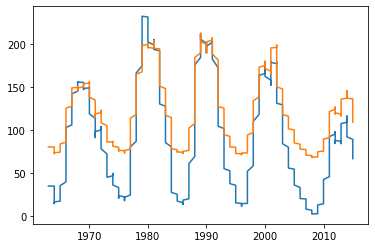

In [8]:
plt.plot(data[:,0], sunspot_num_smth)
plt.plot(data[:,0], solar_flux_smth)
plt.show()

In [13]:
F_exp = data[:, 2]
F = np.empty(F_exp.shape)
R = np.ones([data.shape[0], 4])
beta = np.ones(4)
for i in range(4):
    R[:, i] = data[:, 3]**i
beta = np.linalg.inv((R.T.dot(R))).dot(R.T).dot(F_exp)

In [14]:
beta

array([ 6.72395064e+01,  4.11504437e-01,  2.46004673e-03, -6.59724521e-06])

In [15]:
F = np.ones(data.shape[0])*beta[0]+beta[1]*data[:,3]+beta[2]*data[:,3]**2+beta[3]*data[:,3]**3

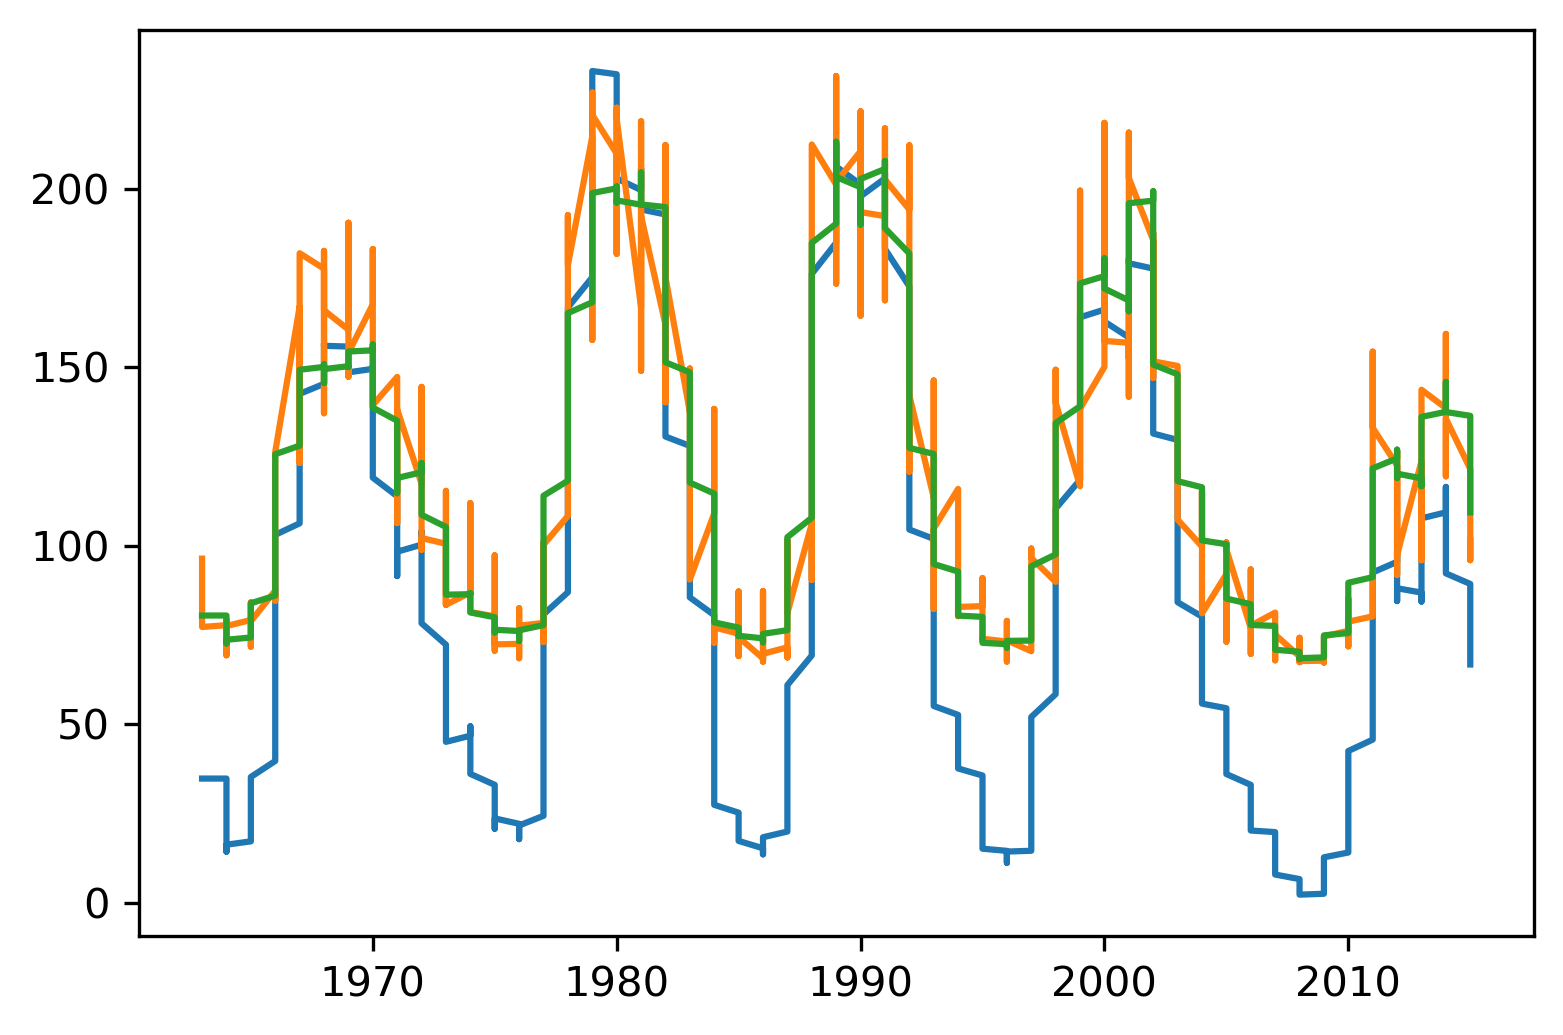

In [18]:
plt.figure(dpi=300)
plt.plot(data[:,0], sunspot_num_smth)
plt.plot(data[:,0], F)
plt.plot(data[:,0], solar_flux_smth)
plt.show()